In [1]:
import votos_crawler
import urna_log_crawler

In [2]:
votos_df = votos_crawler.LoadVotosDataFrame()

In [3]:
votos_df

,UF,QT_BOLSO_2T,QT_LULA_2T,QT_VAL_PRESI_2T
ID_SECAO,,,,
MA_9210_1_86,MA,85,156,241
MA_9210_1_87,MA,90,155,245
MA_9210_1_88,MA,80,154,234
MA_9210_1_89,MA,91,152,243
MA_9210_1_90,MA,83,166,249
...,...,...,...,...
RJ_58130_256_243,RJ,103,80,183
RJ_58130_256_244,RJ,215,136,351
RJ_58130_256_245,RJ,210,90,300


In [4]:
modelo_urnas_df = urna_log_crawler.LoadModeloUrnasDataFrame()

In [5]:
modelo_urnas_df

,SE_UE2020,MODELO_URNA
ID_SECAO,,
AC_1112_6_46,False,UE2015
AC_1457_3_78,False,UE2013
AC_1074_4_446,False,UE2009
AC_1392_9_16,True,UE2020
AC_1473_5_87,False,UE2015
...,...,...
MG_51390_244_91,False,UE2010
MG_47872_167_41,False,UE2010
MT_98191_27_126,False,UE2009


In [6]:
df = votos_df.merge(modelo_urnas_df, on='ID_SECAO', how='left')

In [7]:
df

,UF,QT_BOLSO_2T,QT_LULA_2T,QT_VAL_PRESI_2T,SE_UE2020,MODELO_URNA
ID_SECAO,,,,,,
MA_9210_1_86,MA,85,156,241,True,UE2020
MA_9210_1_87,MA,90,155,245,True,UE2020
MA_9210_1_88,MA,80,154,234,True,UE2020
MA_9210_1_89,MA,91,152,243,True,UE2020
MA_9210_1_90,MA,83,166,249,True,UE2020
...,...,...,...,...,...,...
RJ_58130_256_243,RJ,103,80,183,False,UE2009
RJ_58130_256_244,RJ,215,136,351,False,UE2009
RJ_58130_256_245,RJ,210,90,300,False,UE2009


In [21]:
bolso_em_ue2020 = df[df.SE_UE2020==True].groupby(by='UF').QT_BOLSO_2T.sum()*100/df[df.SE_UE2020==True].groupby(by='UF').QT_VAL_PRESI_2T.sum()
bolso_em_ue2020

UF
AC    72.468199
AL    54.318972
AM    61.265863
AP    55.321396
BA    29.943339
CE    38.556365
DF    58.538713
ES    61.003917
GO    61.953195
MA    34.853210
MG    51.799164
MS    61.982719
MT    60.801115
PA    43.647890
PB    43.043353
PE    41.377459
PI    26.717078
PR    62.669557
RJ    54.162849
RN    41.230437
RO    68.538181
RR    78.716544
RS    54.333061
SC    68.099732
SE    39.353187
SP    56.040796
TO    50.241132
dtype: float64

In [22]:
bolso_em_antigas = df[df.SE_UE2020==False].groupby(by='UF').QT_BOLSO_2T.sum()*100/df[df.SE_UE2020==False].groupby(by='UF').QT_VAL_PRESI_2T.sum()
bolso_em_antigas

UF
AC    68.231986
AL    32.624860
AM    37.366509
AP    48.231961
BA    26.433854
CE    22.376360
DF    59.200343
ES    56.361029
GO    55.998606
MA    23.824940
MG    48.276567
MS    57.242035
MT    68.617139
PA    46.703759
PB    23.321107
PE    26.647198
PI    20.153816
PR    62.194524
RJ    58.481333
RN    28.315164
RO    72.136281
RR    61.416844
RS    57.836269
SC    70.162593
SE    27.281874
SP    54.733548
TO    47.507169
dtype: float64

In [26]:
diff = bolso_em_antigas - bolso_em_ue2020
diff

UF
AC    -4.236213
AL   -21.694112
AM   -23.899354
AP    -7.089435
BA    -3.509486
CE   -16.180005
DF     0.661630
ES    -4.642888
GO    -5.954589
MA   -11.028270
MG    -3.522597
MS    -4.740684
MT     7.816024
PA     3.055868
PB   -19.722245
PE   -14.730261
PI    -6.563262
PR    -0.475033
RJ     4.318483
RN   -12.915274
RO     3.598101
RR   -17.299700
RS     3.503208
SC     2.062861
SE   -12.071313
SP    -1.307248
TO    -2.733963
dtype: float64

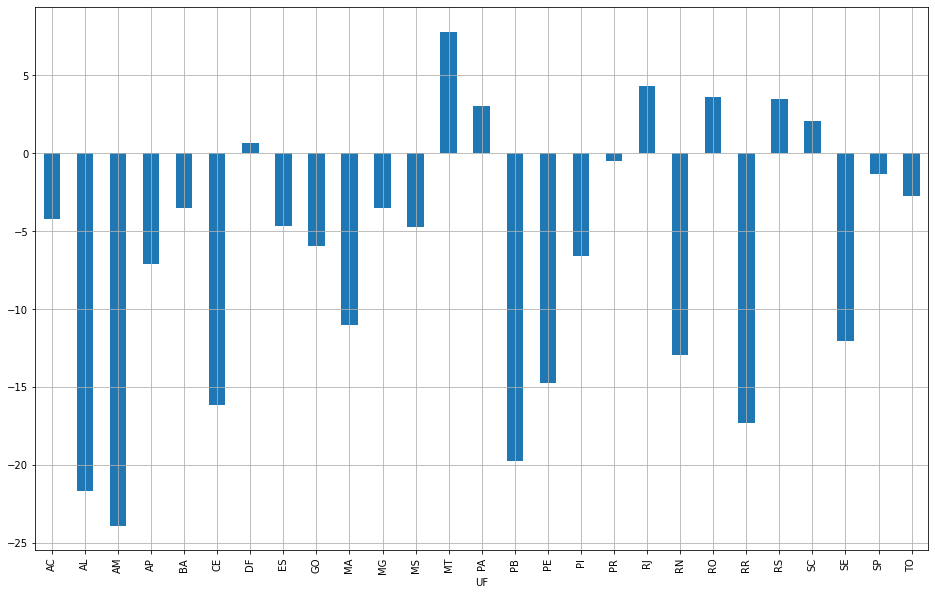

In [25]:
ax = diff.plot.bar(figsize=(16,10), grid=True)


In [13]:
bolso_em_ue2020 = df[df.SE_UE2020==True].QT_BOLSO_2T.sum()*100/df[df.SE_UE2020==True].QT_VAL_PRESI_2T.sum()

bolso_em_antigas = df[df.SE_UE2020==False].QT_BOLSO_2T.sum()*100/df[df.SE_UE2020==False].QT_VAL_PRESI_2T.sum()

diff = bolso_em_antigas - bolso_em_ue2020

In [14]:
diff

-3.4461701730362435

In [15]:
diff/100.*df[df.SE_UE2020==False].QT_VAL_PRESI_2T.sum()

-2307713.210150485